In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rc

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [11]:
# CSV 파일 불러오기
df = pd.read_csv('reverse1999_reviews.csv', encoding='utf-8-sig')

In [12]:
# 1. 리뷰 점수 분포 시각화
def visualize_score_distribution(data):
    score_counts = data['score'].value_counts().sort_index()
    plt.figure(figsize=(8, 5))
    plt.bar(score_counts.index, score_counts.values, width=0.6, color='skyblue')
    plt.title("리뷰 점수 분포", fontsize=16)
    plt.xlabel("점수", fontsize=12)
    plt.ylabel("리뷰 수", fontsize=12)
    plt.xticks(score_counts.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [13]:
# 2. 리뷰 작성 시점 추이 시각화
def visualize_review_trends(data):
    data['date'] = pd.to_datetime(data['at']).dt.date
    date_counts = data['date'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(date_counts.index, date_counts.values, marker='o', color='green')
    plt.title("리뷰 작성 시점 추이", fontsize=16)
    plt.xlabel("날짜", fontsize=12)
    plt.ylabel("리뷰 수", fontsize=12)
    plt.grid()
    plt.show()

In [14]:
# 3. 평점별 평균 리뷰 길이 분석 시각화
def visualize_avg_review_length(data):
    data['review_length'] = data['content'].apply(lambda x: len(str(x)))
    avg_length_by_score = data.groupby('score')['review_length'].mean()
    plt.figure(figsize=(8, 5))
    plt.bar(avg_length_by_score.index, avg_length_by_score.values, color='coral', width=0.6)
    plt.title("평점별 평균 리뷰 길이", fontsize=16)
    plt.xlabel("평점", fontsize=12)
    plt.ylabel("평균 글자 수", fontsize=12)
    plt.xticks(avg_length_by_score.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [15]:
# 4. 워드클라우드 생성
def create_wordcloud(text, title, output_filename):
    okt = Okt()
    nouns = okt.nouns(text)
    word_counts = Counter(nouns)
    font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
    wc = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        max_font_size=100,
        min_font_size=10,
        random_state=42,
    ).generate_from_frequencies(dict(word_counts))

    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

    wc.to_file(output_filename)
    print(f"워드클라우드가 '{output_filename}'로 저장되었습니다.")

In [16]:
# 5. 긍정/부정 리뷰 워드클라우드 시각화
def visualize_wordclouds(data):
    positive_reviews = ' '.join(data[data['score'] >= 4]['content'].dropna())
    negative_reviews = ' '.join(data[data['score'] <= 2]['content'].dropna())

    create_wordcloud(positive_reviews, "긍정 리뷰 워드클라우드", "positive_wordcloud.png")
    create_wordcloud(negative_reviews, "부정 리뷰 워드클라우드", "negative_wordcloud.png")

1. 리뷰 점수 분포 시각화


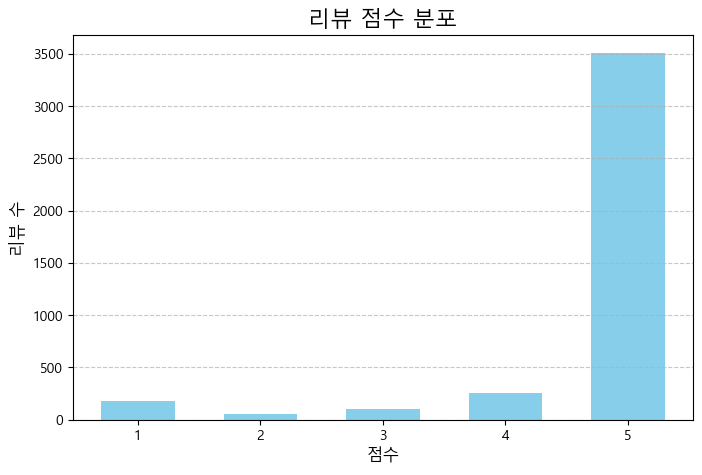

2. 리뷰 작성 시점 추이 시각화


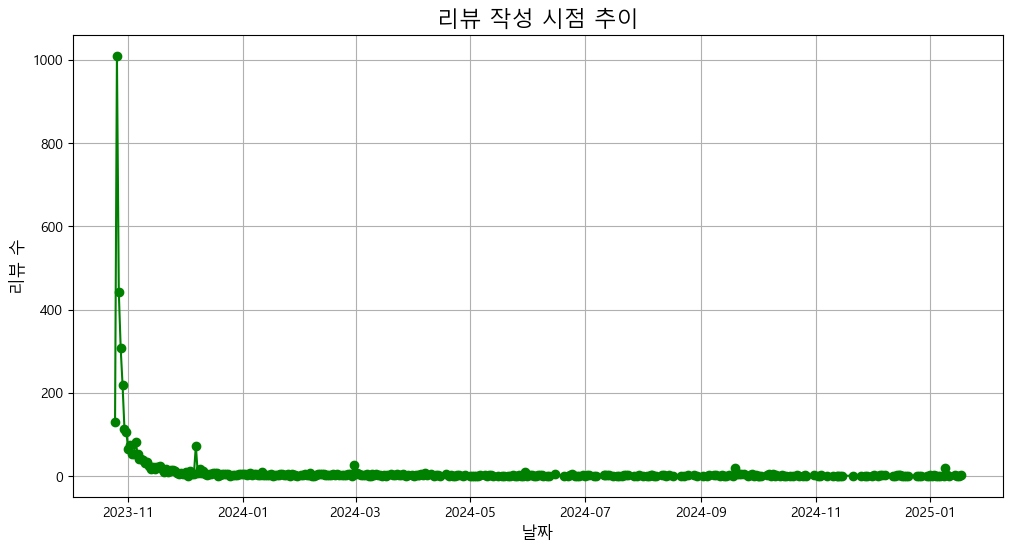

3. 평점별 평균 리뷰 길이 분석 시각화


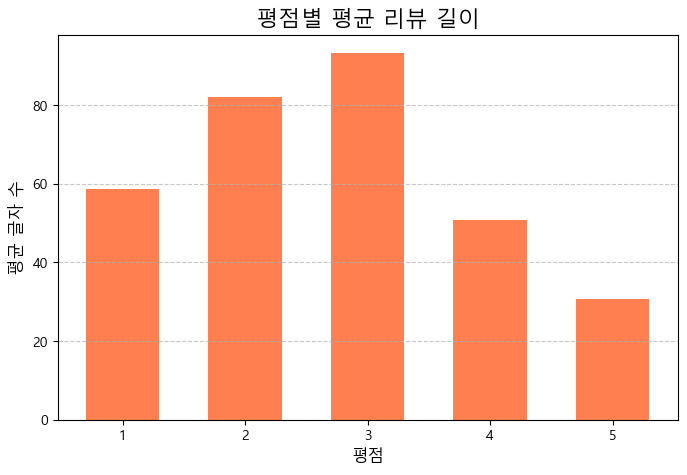

4. 긍정/부정 리뷰 워드클라우드 시각화


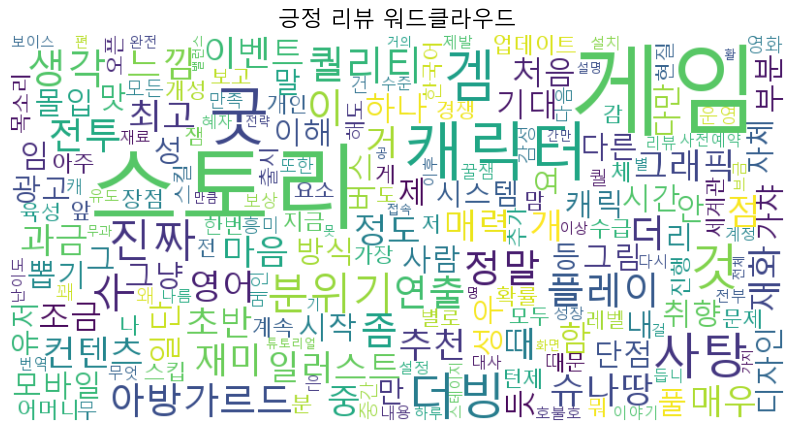

워드클라우드가 'positive_wordcloud.png'로 저장되었습니다.


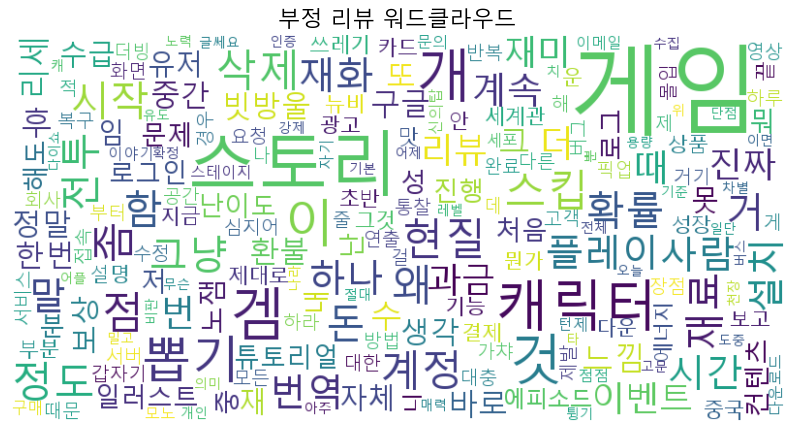

워드클라우드가 'negative_wordcloud.png'로 저장되었습니다.


In [17]:
# 실행 함수
def main():
    print("1. 리뷰 점수 분포 시각화")
    visualize_score_distribution(df)

    print("2. 리뷰 작성 시점 추이 시각화")
    visualize_review_trends(df)

    print("3. 평점별 평균 리뷰 길이 분석 시각화")
    visualize_avg_review_length(df)

    print("4. 긍정/부정 리뷰 워드클라우드 시각화")
    visualize_wordclouds(df)

if __name__ == "__main__":
    main()